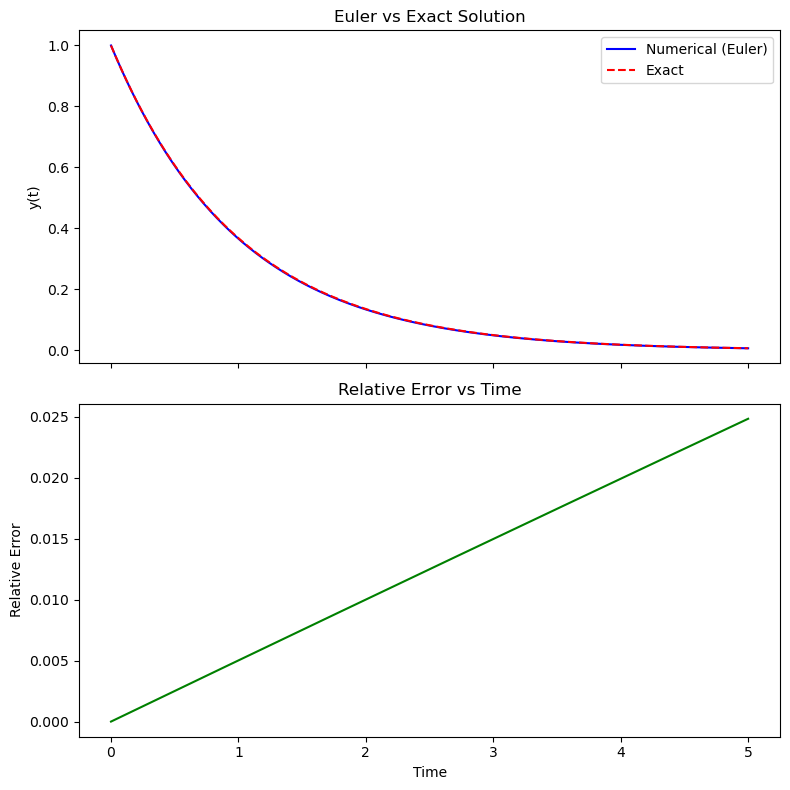

In [19]:
# /Users/faizahmad/euler/plot_solutions.py
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numba import njit
from src.ode_model import ODEModel
from src.euler_solver import EulerSolver

# Define the ODE function in a Numba-compatible way.
@njit
def decay_numba(y: float, t: float) -> float:
    return -y

def exact_decay(y0: float, t: float, k: float = 1.0) -> float:
    return y0 * np.exp(-k * t)

if __name__ == "__main__":
    # Parameters for the decay ODE
    y0, t0, tf, dt = 1.0, 0.0, 5.0, 0.01
    
    # IMPORTANT: Pass the jitted function to ODEModel.
    model = ODEModel(f=decay_numba, y0=y0, t0=t0, tf=tf, dt=dt)
    solver = EulerSolver(model)
    
    # Solve the ODE using Euler's method.
    t_values, y_numeric = solver.solve()
    
    # Compute the exact solution at each time point.
    y_exact = np.array([exact_decay(y0, t) for t in t_values])
    
    # Create plots.
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
    
    # Plot numerical vs. exact solution.
    ax1.plot(t_values, y_numeric, label='Numerical (Euler)', color='blue')
    ax1.plot(t_values, y_exact, label='Exact', linestyle='--', color='red')
    ax1.set_ylabel('y(t)')
    ax1.legend()
    ax1.set_title('Euler vs Exact Solution')
    
    # Plot the relative error.
    relative_error = np.abs((y_numeric - y_exact) / y_exact)
    ax2.plot(t_values, relative_error, color='green')
    ax2.set_ylabel('Relative Error')
    ax2.set_xlabel('Time')
    ax2.set_title('Relative Error vs Time')
    
    plt.tight_layout()
    plt.savefig("plot_output.png")  # Saves the plot to a file.
    plt.show()  # Opens the plot window.
